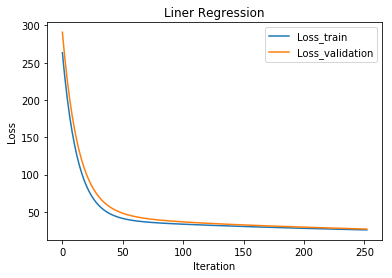

In [1]:
import sklearn
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

dataset_file = "./data/housing_scale"
    
def load_data(file_path):  
#     读取libsvm格式数据  
    x, y = load_svmlight_file(file_path)  
    return x, y

def compute_loss(X, y, theta):
    m = y.shape[0]
    preY = X.dot(theta) - y
    loss = np.sum(preY ** 2) / (2 * m)
    return loss

#    draw the result
def draw_plot(Loss_train, Loss_validation):
    plt.plot(Loss_train, label="Loss_train")
    plt.plot(Loss_validation, label="Loss_validation")
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Liner Regression")
    plt.show()
    
  
def Liner_regression():
    X, y = load_data(dataset_file)
#     随机抽取测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
#     定义超参数
    alpha = 0.01
    epoch = 500
    num_iter = X_train.shape[0]
    theta = np.zeros((X_train.shape[1], 1))
#    用于存储历史误差
    loss_train = np.zeros((num_iter, 1))
    loss_validation = np.zeros((num_iter, 1))   

#     优化theta,回归梯度下降  
    y_train = y_train.reshape((-1,1))
    y_test = y_test.reshape((-1,1))
    for iter in range(num_iter):
        # 对loss求导
        theta -= (alpha / X_train.shape[0]) * (X_train.T.dot(X_train.dot(theta) - y_train))
        loss_train[iter] = compute_loss(X_train, y_train, theta)
        loss_validation[iter] = compute_loss(X_test, y_test, theta)
    draw_plot(loss_train, loss_validation)

if __name__ == "__main__":
    Liner_regression()
